In [1]:
import numpy as np
import pandas as pd
import json
import altair as alt
from vega_datasets import data


alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [3]:
df=pd.read_csv(r'C:\Users\Felipe\Documents\GitHub\EMAP\Visualização\Projeto\dados2\df_topic_new5.csv',sep=';')

C:\Users\Felipe\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (20,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [45]:
df.to_json(r'C:\Users\Felipe\Documents\GitHub\EMAP\Visualização\Projeto\dados2\df_topic_new4.json',orient='records',date_format='iso')

In [7]:
eventos = pd.DataFrame([
    {
        "start": "2014-03-01",
        "end": "2019-12-19",
        "evento": "Lava Jato"
    },
    {
        "start": "2018-04-07",
        "end": "2019-11-08",
        "evento": "Lula é preso"
    },
    {
        "start": "2013-06-02",
        "end": "2013-07-01",
        "evento": "Protestos 2013"
    },
    {
        "start": "2016-04-15",
        "end": "2016-08-25",
        "evento": "Impeachment"
    },
    {
        "start": "2017-05-17",
        "end": "2017-07-17",
        "evento": "Friboigate"
    }
])

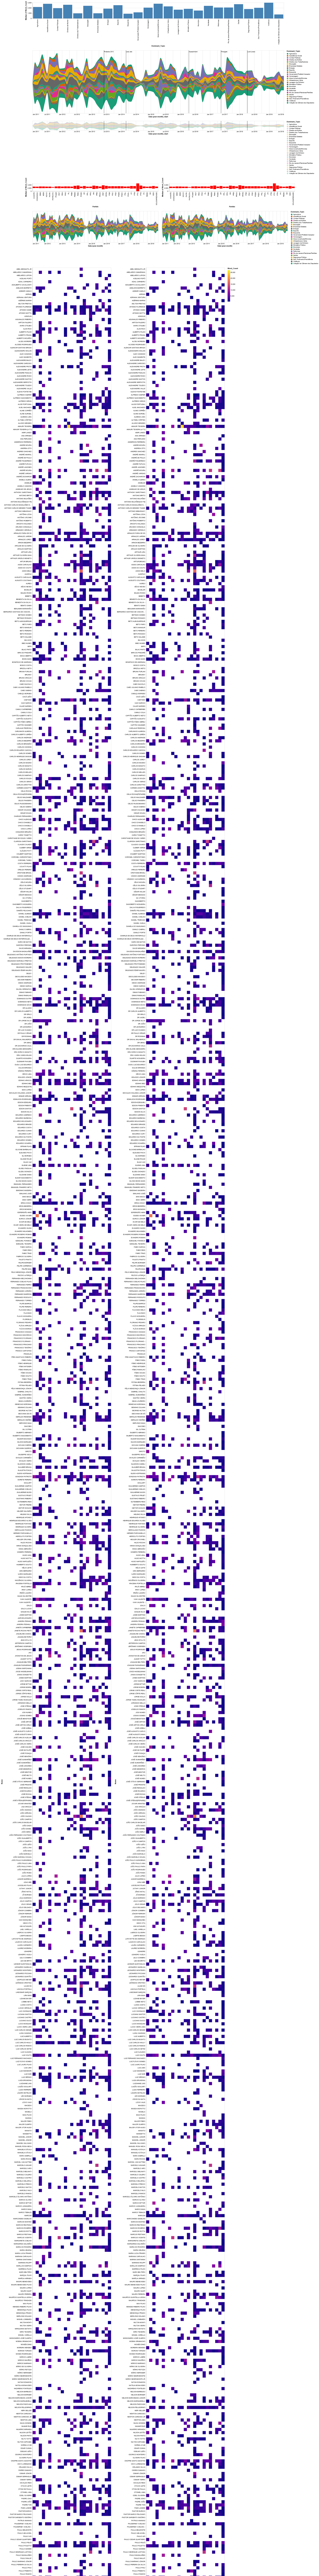

In [64]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

topicos=list(df['Dominant_Topic'].unique())
topicos_valores=[100]*len(topicos)

brush=alt.selection(type='interval',encodings=['x'],fields=['Data','Partido'])
cor=alt.condition(brush,alt.Color('Partido:N',legend=None),alt.Value('lightgray'))
pts=alt.selection(type="multi",encodings=['x'])


bar = alt.Chart('df_topic_new4.json').mark_bar().encode(alt.X('Dominant_Topic:N'),\
                                                        alt.Y('median(Word_Count):Q'),color=alt.condition(pts, alt.ColorValue("steelblue"), alt.ColorValue("grey"))).\
properties(width=1600,height=100).add_selection(pts)

#nearest = alt.selection(type='single', nearest=True, on='mouseover',fields=['x'], empty='none')
#highlight = alt.selection(type='single', on='mouseover',fields=['symbol'], nearest=True)

upper=alt.Chart('df_topic_new4.json',height=400,width=1600).mark_area(interpolate='monotone').encode(alt.X('yearmonth(Data):T',axis=alt.Axis(format=("%b %Y"),domain=False,tickSize=0),scale=alt.Scale(domain=brush)),\
                                      alt.Y('sum(Word_Count):Q',stack='center',axis=None),\
                                      alt.Color('Dominant_Topic:N',scale=alt.Scale(scheme='dark2')),tooltip=['Dominant_Topic:N']).transform_filter(pts)


lower=upper.add_selection(brush).mark_area(opacity=0.3).properties(height=60).transform_filter(pts)

rule=alt.Chart(eventos).mark_rule(color='black',strokeWidth=1).encode(x='start:T')
text=alt.Chart(eventos).mark_text(align='left',baseline='top',dy=-195,size=9).encode(alt.X('start:T',scale=alt.Scale(domain=brush)),text='evento',color=alt.value('#000000'))

pts2=alt.selection(type="single",encodings=['x'])
bar2 = alt.Chart('df_topic_new4.json').mark_bar().encode(alt.X('Partido:N'),\
                                                        alt.Y('median(Word_Count):Q',stack='center'),color=alt.condition(pts2, alt.ColorValue("red"), alt.ColorValue("grey"))).\
properties(width=800,height=50).transform_filter(pts).add_selection(pts2)

pts4=alt.selection(type="multi",encodings=['x'])
#bar4 = alt.Chart('df_topic_new4.json').mark_rect().encode(alt.X('Dominant_Topic:N'),\
#                                                        alt.Y('Nome:N'),color=alt.condition(pts4, alt.ColorValue("red"), alt.ColorValue("grey")),tooltip=['Nome:N']).\
#properties(width=1600,height=2900).transform_filter(pts2).add_selection(pts4).transform_filter(pts)

bar4 = alt.Chart('df_topic_new4.json').mark_rect().encode(alt.X('Dominant_Topic:N',scale=alt.Scale(domain=pts)),\
                                                        alt.Y('Nome:N'),color=alt.Color('Word_Count:Q',scale=alt.Scale(scheme='plasma')),tooltip=[alt.Tooltip('Nome:N',title='Nome'),\
                                                                                                                                                  alt.Tooltip('Dominant_Topic:N',title='Tópico')]).\
properties().transform_filter(pts2).add_selection(pts4).transform_filter(pts)

upper2=alt.Chart('df_topic_new4.json',height=200,width=800).mark_area(interpolate='monotone').encode(alt.X('yearmonth(Data):T',axis=alt.Axis(format=("%b %Y"),domain=False,tickSize=0),scale=alt.Scale(domain=brush)),\
                                      alt.Y('sum(Word_Count):Q',stack='center',axis=None),\
                                      alt.Color('Dominant_Topic:N',scale=alt.Scale(scheme='dark2')),tooltip=['Dominant_Topic:N']).transform_filter(pts2).transform_filter(pts).transform_filter(pts4)


pts3=alt.selection(type="single",encodings=['x'])
bar3 = alt.Chart('df_topic_new4.json').mark_bar().encode(alt.X('Partido:N'),\
                                                        alt.Y('median(Word_Count):Q',stack='center'),color=alt.condition(pts3, alt.ColorValue("red"), alt.ColorValue("grey"))).\
properties(width=800,height=50).transform_filter(pts).add_selection(pts3)

pts5=alt.selection(type="multi",encodings=['x'])
bar5 = alt.Chart('df_topic_new4.json').mark_rect().encode(alt.X('Dominant_Topic:N'),\
                                                        alt.Y('Nome:N'),color=alt.Color('Word_Count:Q',scale=alt.Scale(scheme='plasma')),tooltip=[alt.Tooltip('Nome:N',title='Nome'),\
                                                                                                                                                  alt.Tooltip('Dominant_Topic:N',title='Tópico')]).\
properties().transform_filter(pts3).add_selection(pts5).transform_filter(pts)


upper3=alt.Chart('df_topic_new4.json',height=200,width=800).mark_area(interpolate='monotone').encode(alt.X('yearmonth(Data):T',axis=alt.Axis(format=("%b %Y"),domain=False,tickSize=0),scale=alt.Scale(domain=brush)),\
                                      alt.Y('sum(Word_Count):Q',stack='center',axis=None),\
                                      alt.Color('Dominant_Topic:N',scale=alt.Scale(scheme='dark2')),tooltip=['Dominant_Topic:N']).transform_filter(pts3).transform_filter(pts).transform_filter(pts5)





#highlight_partidos = upper.add_selection(partidos_select).encode(color=partidos_color_condition).properties(title="Temas dos Discursos")

bar & (upper+rule+text) & (lower+rule+text) & (bar2 | bar3) & (upper2 | upper3) & (bar4 | bar5)


In [44]:
len(df)

23479

In [32]:
df=df[df['Dominant_Topic']!='0.0']
df=df[df['Dominant_Topic']!='1.0']
df=df[df['Dominant_Topic']!='11.0']
df=df[df['Dominant_Topic']!='13.0']
df=df[df['Dominant_Topic']!='15.0']
df=df[df['Dominant_Topic']!='18.0']
df=df[df['Dominant_Topic']!='20.0']
df=df[df['Dominant_Topic']!='24.0']
df=df[df['Dominant_Topic']!='28.0']
df=df[df['Dominant_Topic']!='30.0']

In [33]:
df=df[df['Dominant_Topic']!='31.0']
df=df[df['Dominant_Topic']!='37.0']
df=df[df['Dominant_Topic']!='4.0']
df=df[df['Dominant_Topic']!='6.0']
df=df[df['Dominant_Topic']!='7.0']

In [34]:
len(df)

23479

In [4]:
list(df['Dominant_Topic'].unique())

[8.0,
 45.0,
 1.0,
 55.0,
 33.0,
 37.0,
 4.0,
 20.0,
 48.0,
 54.0,
 56.0,
 47.0,
 24.0,
 36.0,
 58.0,
 32.0,
 12.0,
 6.0,
 57.0,
 3.0,
 31.0,
 34.0,
 27.0,
 38.0,
 0.0,
 52.0,
 7.0,
 30.0,
 50.0,
 13.0,
 41.0,
 46.0,
 19.0,
 51.0,
 49.0,
 40.0,
 22.0,
 17.0,
 25.0,
 9.0,
 42.0,
 35.0,
 23.0,
 53.0,
 39.0,
 5.0,
 28.0,
 10.0,
 2.0,
 18.0,
 26.0,
 59.0,
 44.0,
 11.0,
 43.0,
 61.0,
 60.0,
 21.0]

In [92]:
teste=[100]*10

In [93]:
teste

[100, 100, 100, 100, 100, 100, 100, 100, 100, 100]